In [1]:
import pickle
import pandas as pd
import os
from matplotlib import pyplot
from sklearn.svm import SVC
import numpy as np
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import KFold, train_test_split
from scipy.spatial.distance import cdist

In [2]:
dataFile = os.path.join("Data","data.p")
data = None
with open(dataFile, "rb") as input_file:
    data = pickle.load(input_file)

In [3]:
columnsResult = ["Pourcentage vote parti liberal","Pourcentage vote parti npd","Pourcentage vote parti conservateur"]
X = minmax_scale(data.drop(columnsResult, axis=1).values)
y = np.argmin(data[columnsResult].values,axis=1)
test_size = round(y.size*0.66)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)


/home/bryan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [4]:
distance = np.array(cdist(X_train,X_train,"euclidean"))
distance_non_zero = distance[distance!=0]
sigma_min = np.amin(distance_non_zero)
arraySigma = [i*sigma_min for i in range(1,65,5)]
arrayC = [1*10**i for i in range(-5,5,1)]
N = 2


In [5]:
scores_SVMLinear = {}
arrayKernel = ["linear"]
for C in arrayC:
    scores_SVMLinear[C] = []
    for sigma in arraySigma:
        for kernel in arrayKernel:
            Avs=0
            RPK = KFold(n_splits=N)
            for train,test in RPK.split(y_train):
                Data_train,target_train = X_train[train,:],y_train[train]
                Data_test,target_test = X_train[test,:],y_train[test]
                clf = SVC(C=C,kernel=kernel,gamma=(2*sigma**2)**-1)
                clf.fit(Data_train,target_train)
                Avs+=clf.score(Data_test,target_test)
            scores_SVMLinear[C].append(Avs/N)

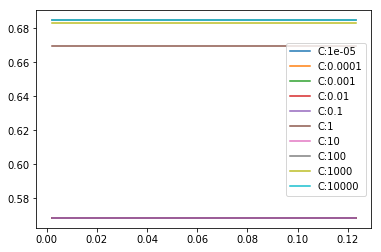

In [6]:
for key,score in scores_SVMLinear.items():
    pyplot.plot(np.array(arraySigma),np.array(score),label= "C:{}".format(key))
pyplot.legend()
pyplot.show()

In [7]:
outputFile = os.path.join("Data","scores_SVMLinear.p")
with open(outputFile, "wb") as handle:
    data = pickle.dump(scores_SVMLinear, handle, protocol=pickle.HIGHEST_PROTOCOL)

scores_SVMPoly = {}
N = 2
arrayKernel = ["poly"]
arraySigma_ = [i*sigma_min for i in range(1,65,30)]
arrayC_ = [1*10**i for i in range(-5,5,4)]
for C in arrayC_:
    scores_SVMPoly[C] = []
    for sigma in arraySigma_:
        for kernel in arrayKernel:
            Avs=0
            RPK = KFold(n_splits=N)
            for train,test in RPK.split(y_train):
                Data_train,target_train = X_train[train,:],y_train[train]
                Data_test,target_test = X_train[test,:],y_train[test]
                clf = SVC(C=C,kernel=kernel,gamma=(2*sigma**2)**-1,degree=2)
                clf.fit(Data_train,target_train)
                Avs+=clf.score(Data_test,target_test)
            scores_SVMPoly[C].append(Avs/N)

for key,score in scores_SVMPoly.items():
    pyplot.plot(np.array(arraySigma),np.array(score),label= "C:{}".format(key))
pyplot.legend()
pyplot.show()

outputFile = os.path.join("Data","scores_SVMPoly.p")
with open(outputFile, "wb") as handle:
    data = pickle.dump(scores_SVMPoly, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
scores_SVMRbf = {}
N = 2
arrayKernel = ["rbf"]
for C in arrayC:
    scores_SVMRbf[C] = []
    for sigma in arraySigma:
        for kernel in arrayKernel:
            Avs=0
            RPK = KFold(n_splits=N)
            for train,test in RPK.split(y_train):
                Data_train,target_train = X_train[train,:],y_train[train]
                Data_test,target_test = X_train[test,:],y_train[test]
                clf = SVC(C=C,kernel=kernel,gamma=(2*sigma**2)**-1)
                clf.fit(Data_train,target_train)
                Avs+=clf.score(Data_test,target_test)
            scores_SVMRbf[C].append(Avs/N)

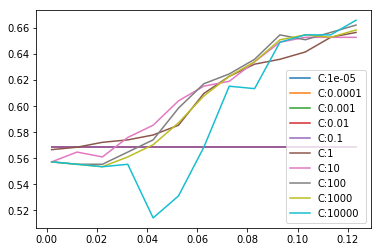

In [9]:
for key,score in scores_SVMRbf.items():
    pyplot.plot(np.array(arraySigma),np.array(score),label= "C:{}".format(key))
pyplot.legend()
pyplot.show()

In [10]:
outputFile = os.path.join("Data","scores_SVMRbf.p")
with open(outputFile, "wb") as handle:
    data = pickle.dump(scores_SVMRbf, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
scores_SVMSigmoid = {}
N = 2
arrayKernel = ["sigmoid"]
for C in arrayC:
    scores_SVMSigmoid[C] = []
    for sigma in arraySigma:
        for kernel in arrayKernel:
            Avs=0
            RPK = KFold(n_splits=N)
            for train,test in RPK.split(y_train):
                Data_train,target_train = X_train[train,:],y_train[train]
                Data_test,target_test = X_train[test,:],y_train[test]
                clf = SVC(C=C,kernel=kernel,gamma=(2*sigma**2)**-1)
                clf.fit(Data_train,target_train)
                Avs+=clf.score(Data_test,target_test)
            scores_SVMSigmoid[C].append(Avs/N)

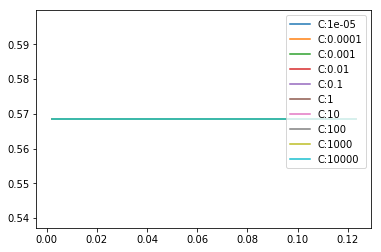

In [12]:
for key,score in scores_SVMSigmoid.items():
    pyplot.plot(np.array(arraySigma),np.array(score),label= "C:{}".format(key))
pyplot.legend()
pyplot.show()

In [13]:
outputFile = os.path.join("Data","scores_SVMSigmoid.p")
with open(outputFile, "wb") as handle:
    data = pickle.dump(scores_SVMSigmoid, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
scores_SVMLinear[10000]

[0.6848159725155585,
 0.6848159725155585,
 0.6848159725155585,
 0.6848159725155585,
 0.6848159725155585,
 0.6848159725155585,
 0.6848159725155585,
 0.6848159725155585,
 0.6848159725155585,
 0.6848159725155585,
 0.6848159725155585,
 0.6848159725155585,
 0.6848159725155585]